<a href="https://colab.research.google.com/github/PX2145-2025/week-9-b-Emma-Goldsmith/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import matplotlib.pyplot as plt

Exercise 0 - Lokta-Volterra equaitons

Text(0, 0.5, 'Number of predators [Kpredators]')

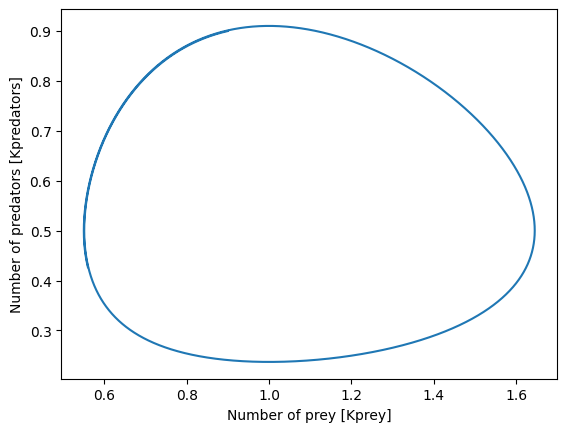

In [118]:
#setting up some constants
alpha = 2/3
beta = 4/3
gamma = delta = 1

#setting up time perametar
n_points = 10000
tmax = 10
dt = tmax/n_points

#initialising the solution array
y = np.zeros((n_points,2)) #number of predator

#initial number of prey (in kilo-prey)
x0 = 0.9

#initial number of predator (in kilo-prey)
y0 = 0.9

y[0] = [x0,y0]

#loop over the integration points
for i in range(0,n_points-1):
  #compute the growth rate from the equations:
  #dx/dt = alpha*x - beta*x*y
  #dy/dt = delta*x*y - gamma*y
  #dy/dt and dx/dt represent the instantaneous growth rates of the two populations
  g = np.array([(alpha*y[i,0])- (beta*y[i,0]*y[i,1]),
                (delta*y[i,0]*y[i,1]) - (gamma*y[i,1])])
  y[i+1] = y[i]+g*dt

#plotting the results
plt.plot(y[:,0], y[:,1])
plt.xlabel('Number of prey [Kprey]')
plt.ylabel('Number of predators [Kpredators]')

Exercise 1 - Complete the orbit_solve function above to implement the Euler method.

In [120]:
# r(t) = r[i], r(t + change in t) = r[1+1]

def orbit_solve (r0, v0, tmax, N, method = 'euler'):
    # set-up the time-step using tmax and N:
    N = 10000
    tmax = 10
    dt = tmax/N
    # set up an array for the output times (using tmax, time-step and N):
    t = np.linspace(0, tmax, N)
    # set up arrays for the positions and velocities (see below)
    r = np.zeros((N,2)) # N rows (time step), 2 columns (x- and y-components)
    v = np.zeros((N,2)) # same shape for v
    # include the initial conditions in the arrays
    r[0] = r0
    v[0] = v0
    # then do the integration for all the integration points
    for i in range (0, N-1):
        dist = np.linalg.norm(r[i])
        a = -G*M * r[i] / dist**3
        r[i+1] = r[i] + v[i]*dt
        v[i+1] = v[i] + a*dt
    # output the solution (arrays for positions and velocities) versus time
    return t, r, v

Exercise 2 - Use your function to solve the 2D equations of motion for a circular orbit. For simplicity, you can set G=1 and M=1. Calculate the time period for one orbit and integrate the equations for a few (say two) periods, and 100 points, and plot the (x,y) motion. Does this look like what you expect? How does this change if N is 200 and 400? (Plot all in one figure.)

Hint: To get the right initial conditions for a circular orbit you can do the following. Choose some separation, and some initial position (for example, r=10 and x(0)=10 and y(0)=10. Then calculate the theoretical value of ω for a circular orbit, and hence the appropriate initial values of $V_y(0)$ and $V_y(0)$. Note that the velocity vector will be perpendicular to the position vector for a circular orbit. You can work out what the time period T is for one orbit, and choose a time step a multiple of $Δt = \frac{T}{100}$ etc.

In [121]:
def orbit_solve(r0, v0, tmax, N):
    dt = tmax / N
    t = np.linspace(0, tmax, N)

    r = np.zeros((N, 2))
    v = np.zeros((N, 2))

    r[0] = r0
    v[0] = v0

    G = 1
    M = 1

    for i in range(N - 1):
        dist = np.linalg.norm(r[i])
        a = -G*M * r[i] / dist**3   # gravitational acceleration

        r[i+1] = r[i] + v[i] * dt
        v[i+1] = v[i] + a * dt

    return t, r, v



In [122]:
import matplotlib.pyplot as plt

G = 1
M = 1

r0 = np.array([10.0, 0.0])
v0 = np.array([0.0, np.sqrt(1/10)])

# orbital period
T = 2 * np.pi * np.sqrt(10**3)

# run for two periods
tmax = 2 * T

results = {}
for N in [100, 200, 400]:
    t, r, v = orbit_solve(r0, v0, tmax, N)
    results[N] = r


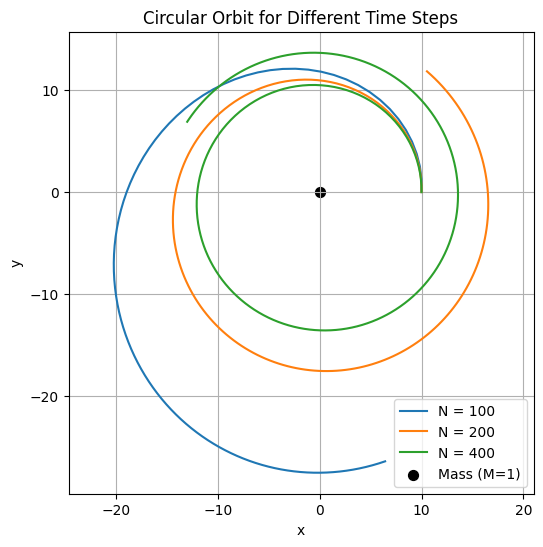

In [123]:
plt.figure(figsize=(6,6))

for N, r in results.items():
    plt.plot(r[:,0], r[:,1], label=f"N = {N}")

plt.scatter([0], [0], color='black', s=50, label="Mass (M=1)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Circular Orbit for Different Time Steps")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


Exercise 3 - Modify your function to include both the Euler-Cromer method and the Verlet method. The method keyword in the function should be used to select the integration method used in the function (using an if statement).

In [124]:
def orbit_solve(r0, v0, tmax, N, method="euler"):

    dt = tmax / N
    t = np.linspace(0, tmax, N)

    r = np.zeros((N, 2))
    v = np.zeros((N, 2))

    r[0] = r0
    v[0] = v0

    GM = 1.0

    # gravitational acceleration
    def acceleration(pos):
        dist = np.linalg.norm(pos)
        return -GM * pos / dist**3
    #Euler method
    if method == "euler":
        for i in range(N - 1):
            a = acceleration(r[i])
            r[i+1] = r[i] + v[i] * dt
            v[i+1] = v[i] + a * dt

    #Euler-cromer method
    elif method == "euler-cromer":
        for i in range(N - 1):
            a = acceleration(r[i])
            v[i+1] = v[i] + a * dt     # Update v first (symplectic)
            r[i+1] = r[i] + v[i+1] * dt

    #Verlet method
    elif method == "verlet":
        a = acceleration(r[0])
        for i in range(N - 1):
            # position update
            r[i+1] = r[i] + v[i] * dt + 0.5 * a * dt**2

            # compute acceleration at new position
            a_new = acceleration(r[i+1])

            # velocity update
            v[i+1] = v[i] + 0.5 * (a + a_new) * dt

            # prepare for next iteration
            a = a_new

    else:
        raise ValueError("Unknown method. Choose 'euler', 'euler-cromer', or 'verlet'.")

    return t, r, v


Exercise 4 - Compare the Euler, Euler-Cromer and Verlet method by plotting a graph for a given number of points. Again, choose just a few orbits.

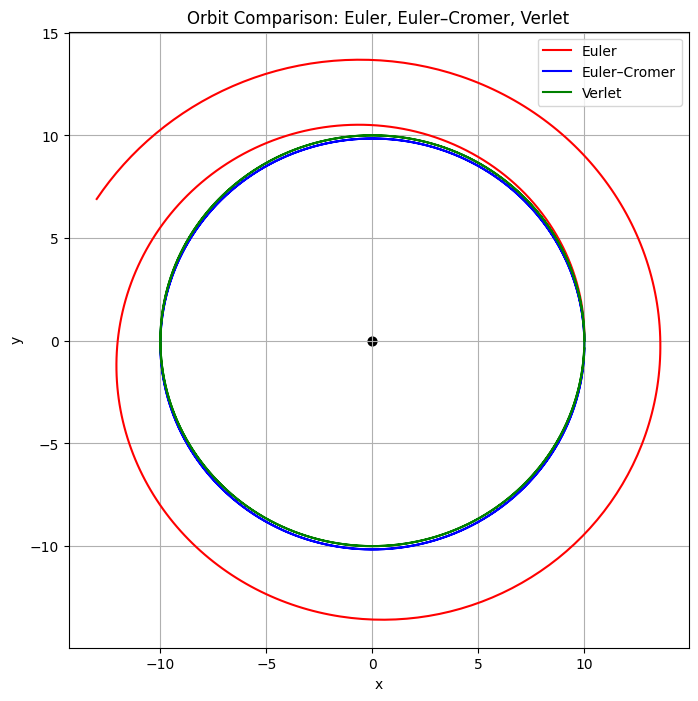

In [125]:
#initila conditions
r0 = np.array([10.0, 0.0])
v0 = np.array([0.0, np.sqrt(1/10)])

# one orbital period
T = 2 * np.pi * np.sqrt(10**3)

# simulate for two orbits
tmax = 2 * T

# number of time steps
N = 400

t_e, r_e, v_e = orbit_solve(r0, v0, tmax, N, method="euler")
t_ec, r_ec, v_ec = orbit_solve(r0, v0, tmax, N, method="euler-cromer")
t_v, r_v, v_v = orbit_solve(r0, v0, tmax, N, method="verlet")

plt.figure(figsize=(8,8))
plt.plot(r_e[:,0], r_e[:,1], color="red", label="Euler")
plt.plot(r_ec[:,0], r_ec[:,1], color="blue", label="Euler–Cromer")
plt.plot(r_v[:,0], r_v[:,1], color="green", label="Verlet")
plt.scatter([0], [0], s=40, color="black") # middle marker
plt.xlabel("x")
plt.ylabel("y")
plt.title("Orbit Comparison: Euler, Euler–Cromer, Verlet")
plt.grid()
plt.legend()